In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv')


In [4]:
# Remove irrelevant columns
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job'], axis=1)

# Print the shape of the dataframe after dropping columns
print(f'Dataframe shape after dropping irrelevant columns: {df.shape}')

Dataframe shape after dropping irrelevant columns: (10000, 36)


In [5]:
# Handle missing values
df = df.dropna()

# Print the shape of the dataframe after handling missing values
print(f'Dataframe shape after handling missing values: {df.shape}')

# Transform all categorical variables
categorical_vars = ['Churn', 'Contract', 'InternetService', 'PaymentMethod', 'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df = pd.get_dummies(df, columns=categorical_vars)

# Print the shape of the dataframe after one-hot encoding
print(f'Dataframe shape after one-hot encoding: {df.shape}')


Dataframe shape after handling missing values: (10000, 36)
Dataframe shape after one-hot encoding: (10000, 62)


In [6]:
scaler = StandardScaler()

# List of continuous variables to scale
continuous_vars = ['Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

# Scale the continuous variables
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])
df.to_csv('cleaned_customer_data_.csv', index=False)

# Print means and scales of the continuous variables after scaling
print("Means after scaling:", scaler.mean_)
print("Scales after scaling:", scaler.scale_)


Means after scaling: [5.30784000e+01 3.98069268e+04 1.00018482e+01 1.20160000e+01
 9.94200000e-01 3.98000000e-01 3.45261881e+01 1.72624816e+02
 3.39234155e+03]
Scales after scaling: [2.06978466e+01 2.81985067e+04 2.97587038e+00 3.02574685e+00
 9.88416086e-01 6.35921379e-01 2.64417404e+01 4.29409469e+01
 2.18518558e+03]


Linkage Matrix:
 [[6.26700000e+03 6.93600000e+03 2.98498364e+00 2.00000000e+00]
 [2.23000000e+02 2.18200000e+03 3.13782247e+00 2.00000000e+00]
 [1.59500000e+03 1.95600000e+03 3.17290388e+00 2.00000000e+00]
 ...
 [1.99870000e+04 1.99940000e+04 1.05509204e+02 4.28000000e+03]
 [1.99950000e+04 1.99960000e+04 1.71275661e+02 9.21800000e+03]
 [1.99860000e+04 1.99970000e+04 2.23544877e+02 1.00000000e+04]]


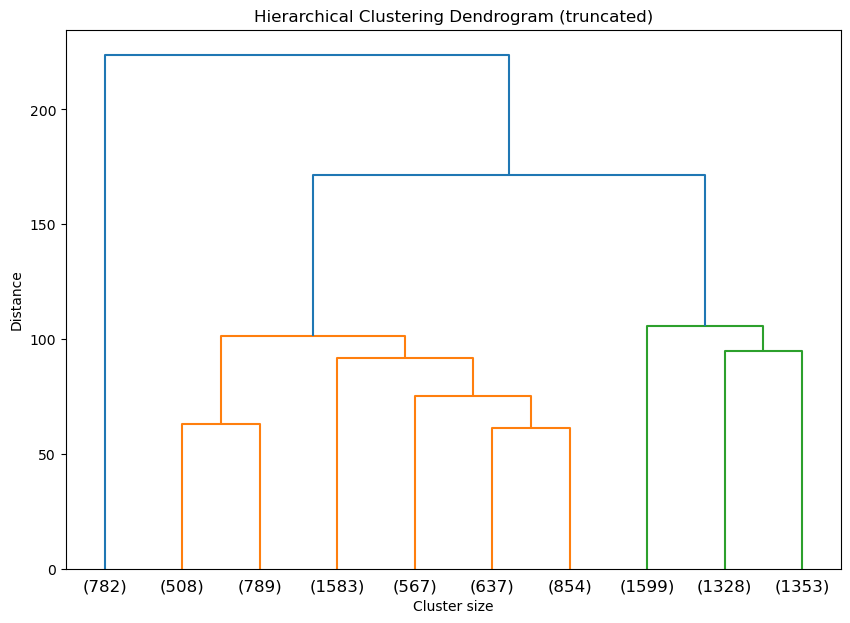

In [7]:
Z = linkage(df, 'ward')  # 'ward' is one method of calculating distance between clusters
# Print the linkage matrix
print('Linkage Matrix:\n', Z)

plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=10)  # Show only the last 10 merged clusters
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()



In [8]:
scaler = StandardScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])
print("Means:", scaler.mean_)
print("Scales:", scaler.scale_)


Means: [-9.55679980e-17  5.22248911e-17  9.52127266e-17 -1.70530257e-17
 -6.03961325e-18 -8.24229573e-17  2.27373675e-17 -2.52953214e-16
  9.09494702e-17]
Scales: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
from scipy.cluster.hierarchy import fcluster

# set a distance threshold, which can be determined from the dendrogram
distance_threshold = 100  # adjust this value based on your dendrogram
labels = fcluster(Z, distance_threshold, criterion='distance')



In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.03368302546657561
